In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
import yfinance as yf

In [3]:
start = '2010-01-01'
end = '2023-12-21'
stock = 'GOOG'
data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,15.615220,15.678981,15.547723,15.610239,15.610239,78541293
2010-01-05,15.620949,15.637387,15.480475,15.541497,15.541497,120638494
2010-01-06,15.588072,15.588072,15.102393,15.149715,15.149715,159744526
2010-01-07,15.178109,15.193053,14.760922,14.797037,14.797037,257533695
2010-01-08,14.744733,15.024933,14.672753,14.994298,14.994298,189680313
...,...,...,...,...,...,...
2023-12-14,134.770004,135.035004,131.059998,133.199997,133.199997,29619100
2023-12-15,132.919998,134.830002,132.630005,133.839996,133.839996,58569400
2023-12-18,133.860001,138.380005,133.770004,137.190002,137.190002,25699800


In [3]:
data.reset_index(inplace=True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.615220,15.678981,15.547723,15.610239,15.610239,78541293
1,2010-01-05,15.620949,15.637387,15.480475,15.541497,15.541497,120638494
2,2010-01-06,15.588072,15.588072,15.102393,15.149715,15.149715,159744526
3,2010-01-07,15.178109,15.193053,14.760922,14.797037,14.797037,257533695
4,2010-01-08,14.744733,15.024933,14.672753,14.994298,14.994298,189680313
...,...,...,...,...,...,...,...
3511,2023-12-14,134.770004,135.035004,131.059998,133.199997,133.199997,29619100
3512,2023-12-15,132.919998,134.830002,132.630005,133.839996,133.839996,58569400
3513,2023-12-18,133.860001,138.380005,133.770004,137.190002,137.190002,25699800
3514,2023-12-19,138.000000,138.770004,137.449997,138.100006,138.100006,20661000


In [5]:
ma_100_days = data.Close.rolling(100).mean()

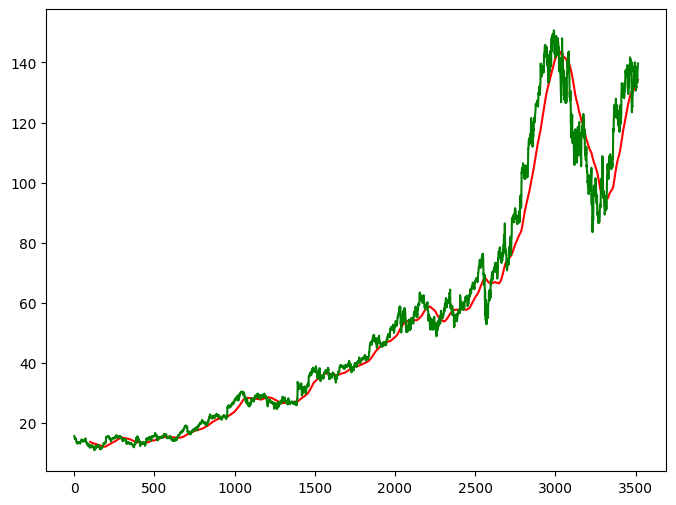

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

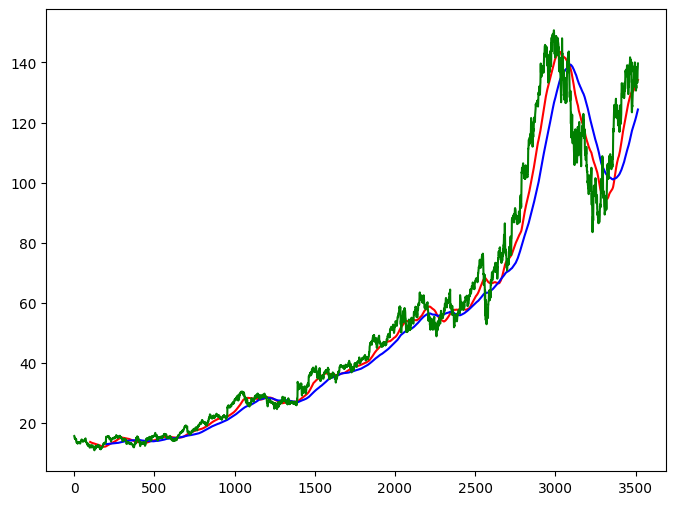

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [9]:
data.dropna(inplace=True) 

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)]) 

In [11]:
data_train.shape[0]    

2812

In [12]:
data_test.shape[0]  

704

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) 

In [14]:
data_train_scale = scaler.fit_transform(data_train)    

In [15]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [19]:
x, y = np.array(x), np.array(y)

In [20]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\sonia\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
model.fit(x,y, epochs = 150, batch_size =32, verbose =1)

Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 13s 105ms/step - loss: 0.0444
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - loss: 0.0046
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - loss: 0.0037
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - loss: 0.0038
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - loss: 0.0033
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - loss: 0.0029
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - loss: 0.0031
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - loss: 0.0033
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - loss: 0.0026
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - loss: 0.0025
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - loss: 0.0028
Epoch 12/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - loss: 0.0021
Epoch 13/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - loss: 0.0022
Epoch 14/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - loss: 0.0021
Epoch 15/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - 

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [25]:
pas_100_days = data_train.tail(100)

In [26]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [27]:
data_test_scale  =  scaler.fit_transform(data_test)adefw

In [28]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [29]:
y_predict = model.predict(x)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


In [30]:
scale =1/scaler.scale_

In [31]:
y_predict = y_predict*scale

In [32]:
y = y*scale

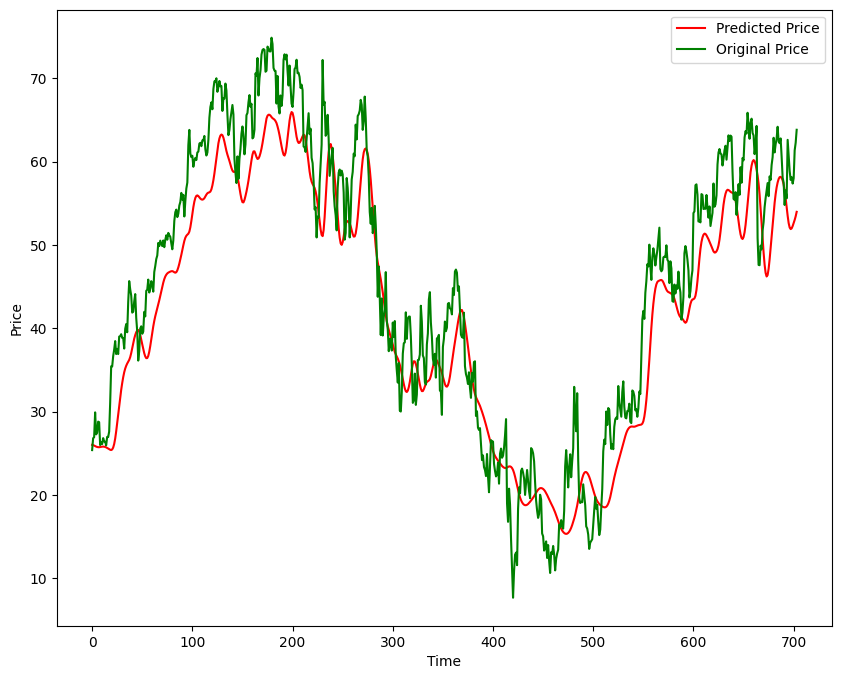

In [33]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [34]:
model.save('Stock Predictions Model.keras')

In [35]:
pip list

Package                   Version
------------------------- --------------
absl-py                   2.1.0
anyio                     4.3.0
appdirs                   1.4.4
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
astunparse                1.6.3
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.14.0
beautifulsoup4            4.12.3
bleach                    6.1.0
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.0
cycler                    0.12.1
debugpy                   1.8.1
decorator                 5.1.1
defusedxml                0.7.1
executing                 2.0.1
fastjsonschema            2.19.1
flatbuffers               24.3.25
fonttools                 4.50.0
fqdn                      1.5.1
frozendict     

In [1]:
import os
os.getcwd()

'C:\\Users\\sonia'